# Data Processing (With Pandas)
---

## Pivot Table

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_flyghts = sns.load_dataset('flights')
df_flyghts.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Using Pandas `pivot_table()`

In [2]:
df_flights_pivot = df_flyghts.pivot_table(values='passengers', index='month', columns='year')
df_flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


### Visualize data in a heatmap

<AxesSubplot:xlabel='year', ylabel='month'>

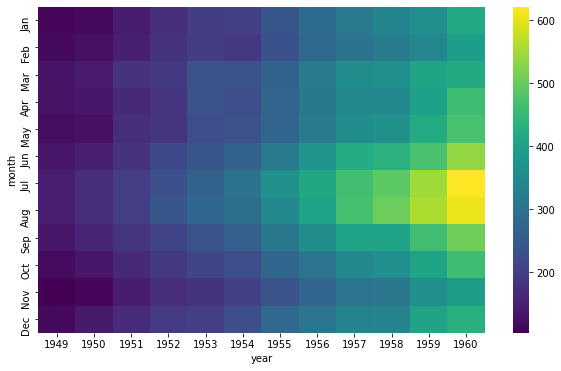

In [3]:
plt.figure(figsize=[10, 6])
sns.heatmap(df_flights_pivot, cmap='viridis')

### Pivot table to find **correlation**

In [4]:
shopping = {'CLIENTE':['José', 'José', 'José', 'José', 'Maria', 'Maria', 'Beltrano', 'Beltrano', 'Beltrano', 'Beltrano', 'Maria José', 'Tereza', 'Tereza', 'Tereza', 'Tereza', 'Tereza', 'Michael', 'Michael', 'David', 'David', 'David', 'David', 'Carol', 'Carol', 'Eduardo', 'Eduardo', 'Eduardo', 'Eduardo', 'Fernando', 'Fernando', 'Fernando', 'Marcos', 'Marcos', 'Andreia', 'Andreia', 'Julia', 'Julia', 'Carlos', 'Carlos', 'Rubens', 'Rubens', 'Bruno', 'Bruno'],
            'PRODUTO':['camiseta', 'camisa', 'jeans', 'meia', 'gravata', 'jeans', 'camiseta', 'jeans', 'meia', 'sapato', 'gravata', 'camiseta', 'camisa', 'jeans', 'meia', 'gravata', 'camiseta', 'camisa', 'jeans', 'gravata', 'meia', 'sapato', 'sapato', 'meia', 'camiseta', 'camisa', 'jeans', 'gravata', 'sapato', 'meia', 'gravata', 'jeans', 'gravata', 'jeans', 'gravata',  'jeans', 'gravata',  'jeans', 'gravata',  'jeans', 'gravata',  'jeans', 'gravata']}

In [5]:
df_shopping = pd.DataFrame(shopping)
df_shopping.head(10)

,CLIENTE,PRODUTO
0,José,camiseta
1,José,camisa
2,José,jeans
3,José,meia
4,Maria,gravata
5,Maria,jeans
6,Beltrano,camiseta
7,Beltrano,jeans
8,Beltrano,meia
9,Beltrano,sapato


### Adding a new column `QTD` to be used as a quantifier for which categorical variable

In [6]:
df_shopping['QTD'] = 1
df_shopping.head(10)

,CLIENTE,PRODUTO,QTD
0,José,camiseta,1
1,José,camisa,1
2,José,jeans,1
3,José,meia,1
4,Maria,gravata,1
5,Maria,jeans,1
6,Beltrano,camiseta,1
7,Beltrano,jeans,1
8,Beltrano,meia,1
9,Beltrano,sapato,1


In [7]:
df_shopping_pivot = df_shopping.pivot_table(values='QTD', index='CLIENTE', columns='PRODUTO', fill_value=0)
df_shopping_pivot

PRODUTO,camisa,camiseta,gravata,jeans,meia,sapato
CLIENTE,,,,,,
Andreia,0,0,1,1,0,0
Beltrano,0,1,0,1,1,1
Bruno,0,0,1,1,0,0
Carlos,0,0,1,1,0,0
Carol,0,0,0,0,1,1
David,0,0,1,1,1,1
Eduardo,1,1,1,1,0,0
Fernando,0,0,1,0,1,1
José,1,1,0,1,1,0


### **Correlation Matrix** (coefficiente for column correlation)

<AxesSubplot:xlabel='PRODUTO', ylabel='PRODUTO'>

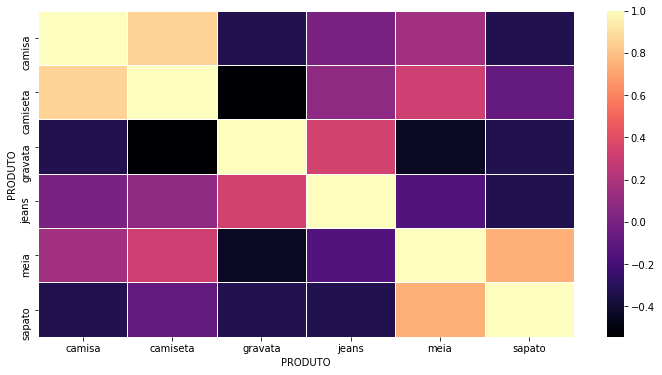

In [8]:
shopping_corr = df_shopping_pivot.corr()

plt.figure(figsize=[12, 6])
sns.heatmap(shopping_corr, cmap='magma', linecolor='white', linewidths=1)